# Finalized Graphs for Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, classification_report

In [2]:
dialysis = pd.read_csv('Data/capstone2_dialysis_scaled_data.csv', index_col=0)

In [3]:
features = ['Network', 
            'Star Rating', 
            'Profit Or Non-Profit', 
            'Chain Owned',
            'Late Shift',
            'Number Of Dialysis Stations',
            'Offers In-Center Hemodialysis',
            'Offers Peritoneal Dialysis',
            'Offers Home Hemodialysis Training',
            'Percentage Of Medicare Patients With Hgb < 10 g/dL',
            'Percentage Of Medicare Patients With Hgb > 12 g/dL',
            'Percent Of Adult HD Patients With Kt/V >= 1.2',
            'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)',
            'Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL',
            'Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL',
            'Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL',
            'Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL',
            'Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL',
            'Percentage Of Adult Patients With Long Term Catheter In Use',
            'Standardized First Kidney Transplant Waitlist Ratio',
            'Percentage Of Prevalent Patients Waitlisted',
            'Mortality Rate Standardized',
            'Readmission Rate Standardized',
            'Hospitalization Rate Standardized',
            'Standard Infection Ratio Standardized',
            'Transfusion Rate Standardized',
            'Fistula Rate Standardized']

In [4]:
dialysis = dialysis[features]

<AxesSubplot:>

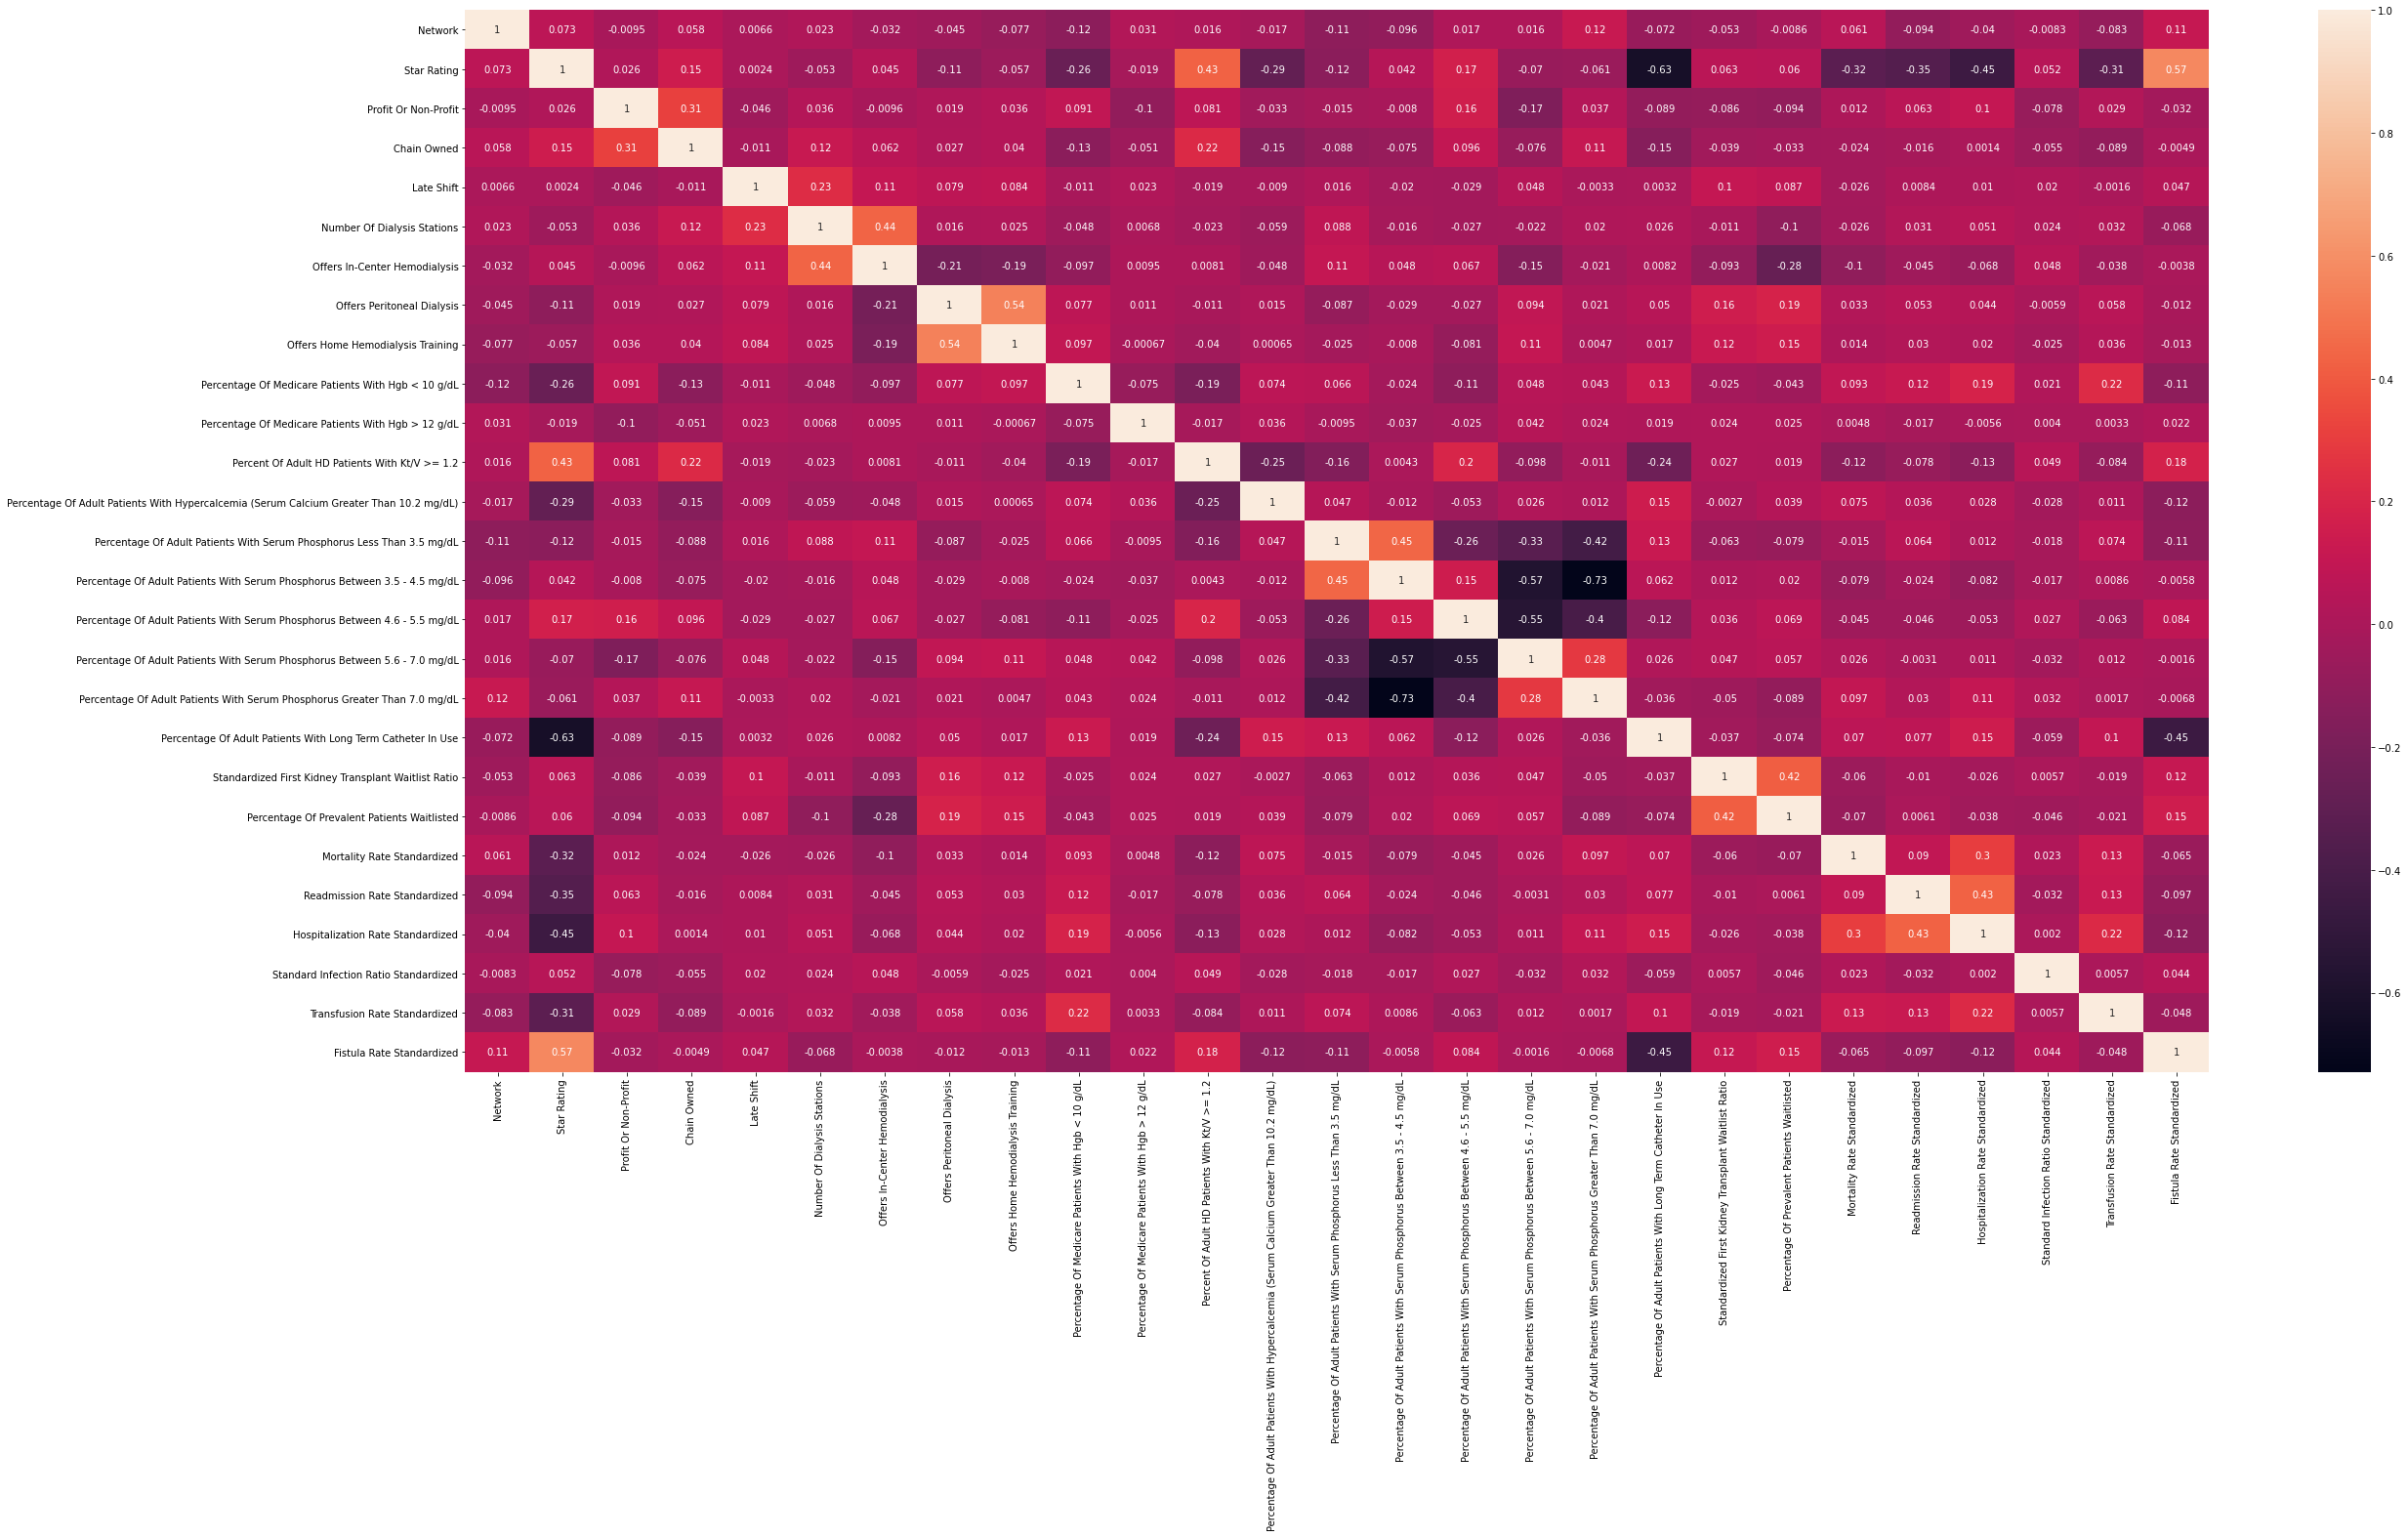

In [5]:
plt.figure(figsize=(40,20))
sns.heatmap(dialysis.corr(), annot=True)

In [6]:
sns.set_theme(font_scale=1.5, rc={'axes.facecolor':'lightgray', 'figure.facecolor':'darkgray', 'axes.grid':False, 'figure.figsize':(12,7)})

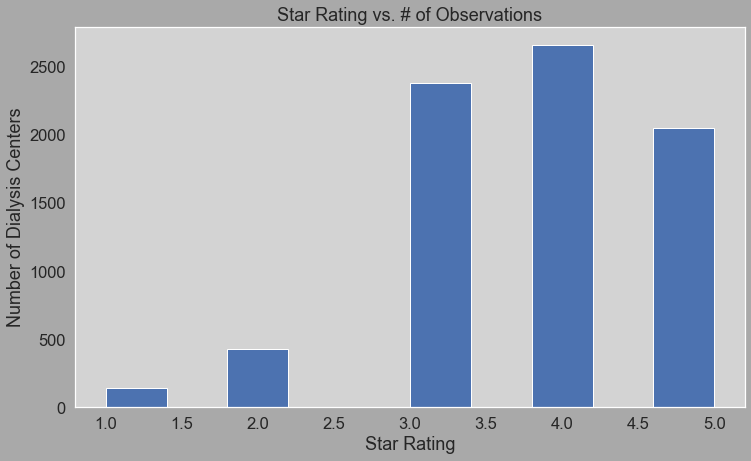

In [28]:
# Plot Five Star to see how dependent variable is distributed
_ = plt.hist(dialysis['Star Rating'])
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Number of Dialysis Centers')
_ = plt.title('Star Rating vs. # of Observations')

### Model's independent features determined by grading features

Star rating is based solely on patient health statistics. Each dialysis center is graded on nine separate health statistics.  These include:

- **Mortality Ratios** 
-- Mortality Rate Standardized
- **Hospitalizations** 
-- Hospitalization Rate Standardized
- **Blood Transfusions** 
-- Transfusion Rate Standardized
- **Incidents of Hypercalcemia** 
-- Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)
- **Percentage of AV fistulas**
-- Fistula Rate Standardized
- **Percentage of Catheters In Use Over 90 Days**
-- Percentage Of Adult Patients With Long Term Catheter In Use
- **Percentage of Waste Removed During Hemodialysis in Adults and Children & Percentage of Waste Removed in Adults During Peritoneal Dialysis**
-- Percent Of Adult HD Patients With Kt/V >= 1.2
-- Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)
-- *Children data was too sparse to be use*

Percentage of Waste Removed During Hemodialysis in Adults and Children & Percentage of Waste Removed in Adults During Peritoneal Dialysis are broad terms encompassing multiple features. In order to avoid overfitting, decided to use the features that at least moderately correlated (>= 0.3) with the dependent variable (star rating).

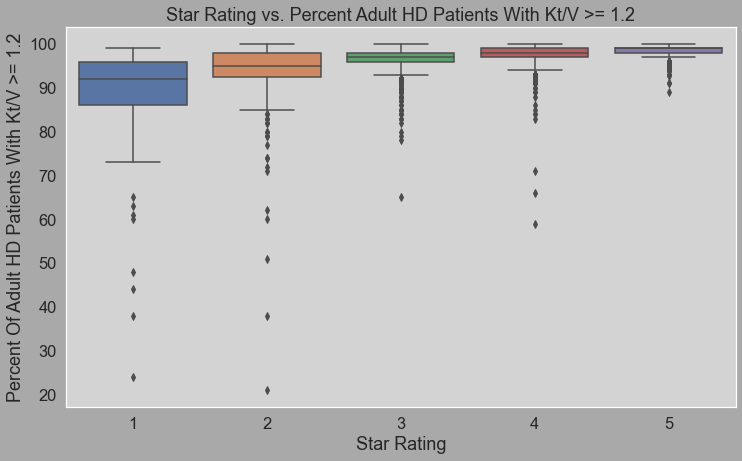

In [7]:
_ = sns.boxplot(data=dialysis, x='Star Rating', y='Percent Of Adult HD Patients With Kt/V >= 1.2')
_ = plt.title('Star Rating vs. Percent Adult HD Patients With Kt/V >= 1.2')

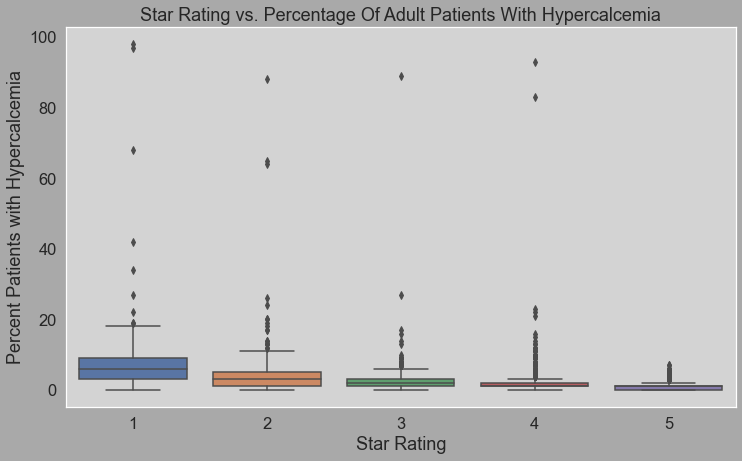

In [8]:
_ = sns.boxplot(data=dialysis, x='Star Rating', y='Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)')
_ = plt.title('Star Rating vs. Percentage Of Adult Patients With Hypercalcemia')
_ = plt.ylabel('Percent Patients with Hypercalcemia')
# Hypercalcemia = Serum Calcium Greater Than 10.2 mg/dL

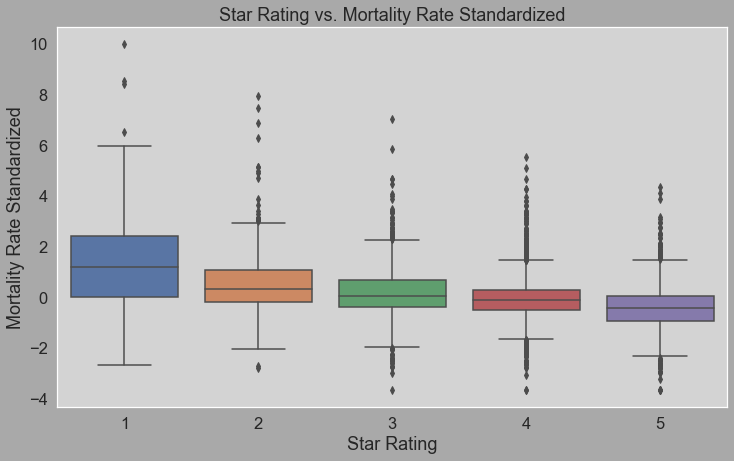

In [9]:
_ = sns.boxplot(data=dialysis, x='Star Rating', y='Mortality Rate Standardized')
_ = plt.title('Star Rating vs. Mortality Rate Standardized')

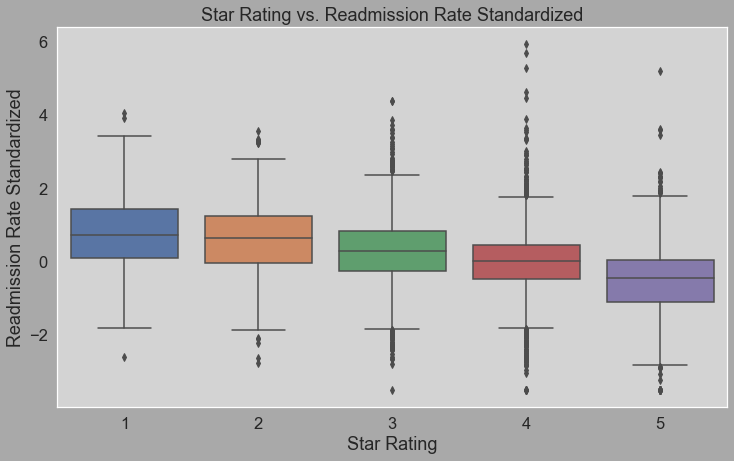

In [10]:
_ = sns.boxplot(data=dialysis, x='Star Rating', y='Readmission Rate Standardized')
_ = plt.title('Star Rating vs. Readmission Rate Standardized')

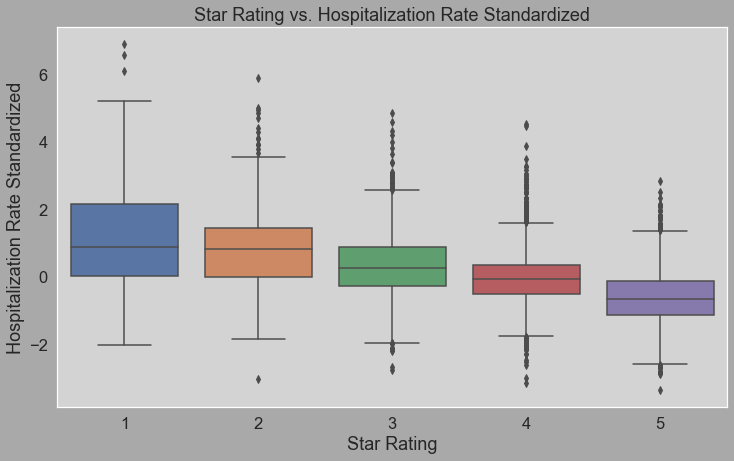

In [11]:
_ = sns.boxplot(data=dialysis, x='Star Rating', y='Hospitalization Rate Standardized')
_ = plt.title('Star Rating vs. Hospitalization Rate Standardized')

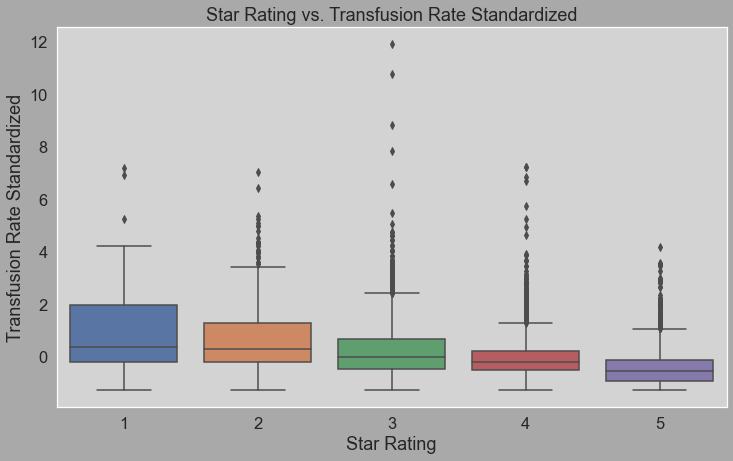

In [12]:
_ = sns.boxplot(data=dialysis, x='Star Rating', y='Transfusion Rate Standardized')
_ = plt.title('Star Rating vs. Transfusion Rate Standardized')

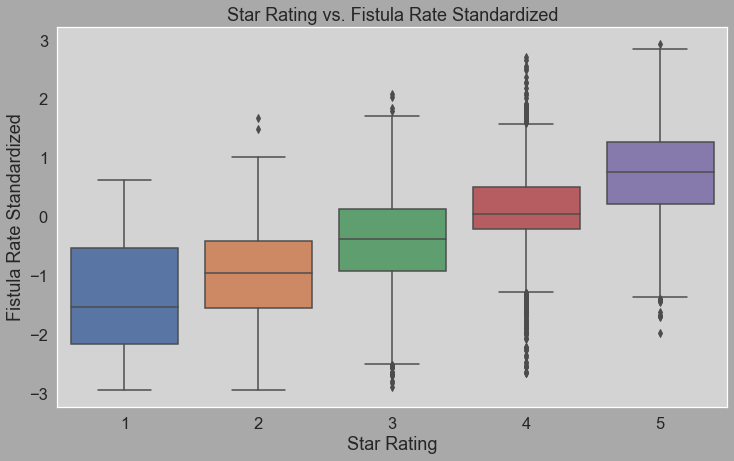

In [13]:
_ = sns.boxplot(x='Star Rating', y='Fistula Rate Standardized', data=dialysis)
_ = plt.title('Star Rating vs. Fistula Rate Standardized')

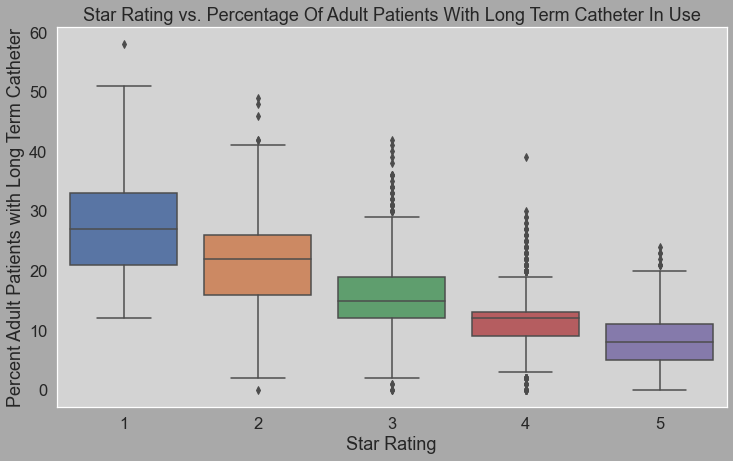

In [14]:
_ = sns.boxplot(x='Star Rating', y='Percentage Of Adult Patients With Long Term Catheter In Use', data=dialysis)
_ = plt.ylabel('Percent Adult Patients with Long Term Catheter')
_ = plt.title('Star Rating vs. Percentage Of Adult Patients With Long Term Catheter In Use')

## Correlation between features

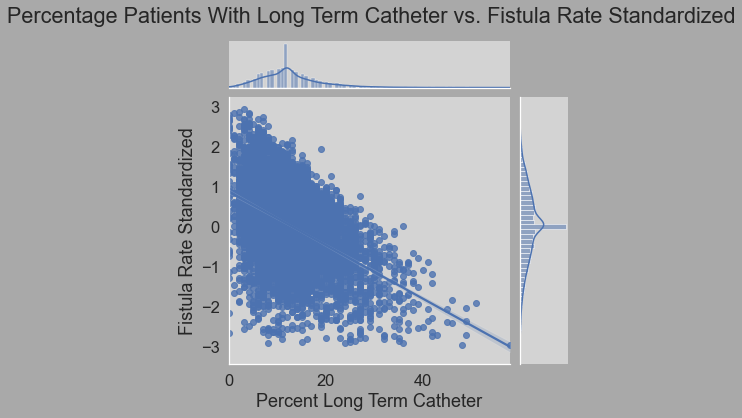

In [15]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Long Term Catheter In Use', y='Fistula Rate Standardized', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Patients With Long Term Catheter vs. Fistula Rate Standardized')
_ = plt.xlabel('Percent Long Term Catheter')
# Patients refers only to adult patients

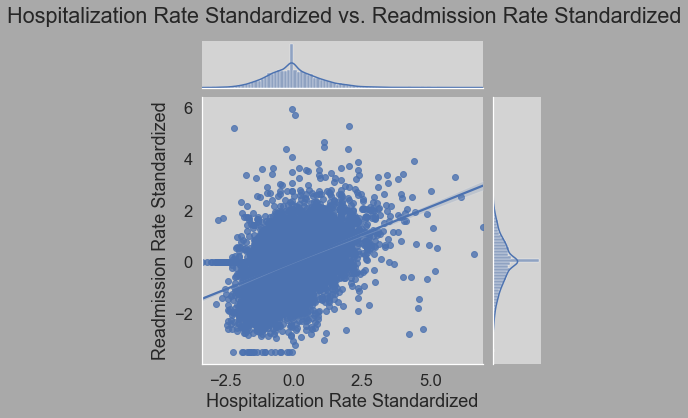

In [16]:
_ = sns.jointplot(x='Hospitalization Rate Standardized', y='Readmission Rate Standardized', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Hospitalization Rate Standardized vs. Readmission Rate Standardized')

## Other interesting correlations in data

## Notes on data

/Users/nicholehartz/opt/anaconda3/envs/TestEnv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


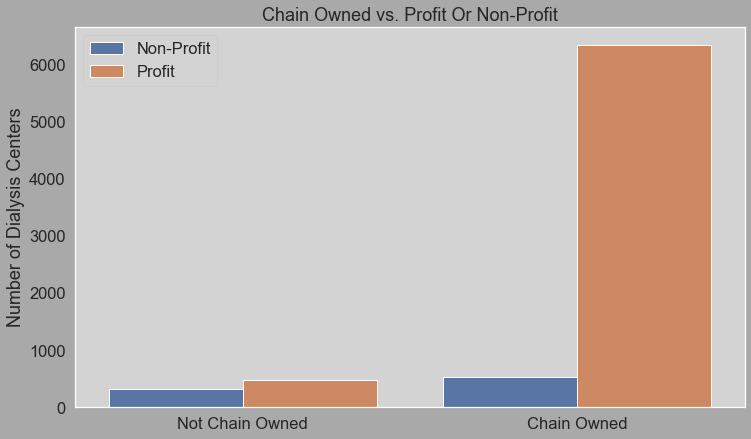

In [17]:
_ = sns.countplot('Chain Owned', hue='Profit Or Non-Profit', data=dialysis)
_ = plt.title('Chain Owned vs. Profit Or Non-Profit')
_ = plt.xlabel('')
_ = plt.ylabel('Number of Dialysis Centers')
_ = plt.xticks([0,1],['Not Chain Owned', 'Chain Owned'])
_ = plt.legend(('Non-Profit', 'Profit'))

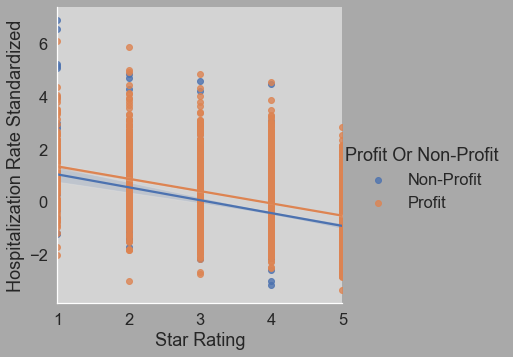

In [18]:
_ = sns.lmplot(x='Star Rating', y='Hospitalization Rate Standardized', hue='Profit Or Non-Profit', data=dialysis)
new_labels = ['Non-Profit', 'Profit']
for t, l in zip(_._legend.texts, new_labels): t.set_text(l)

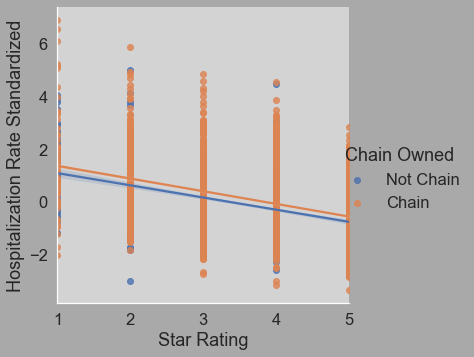

In [19]:
_ = sns.lmplot(x='Star Rating', y='Hospitalization Rate Standardized', hue='Chain Owned', data=dialysis)
new_labels = ['Not Chain', 'Chain']
for t, l in zip(_._legend.texts, new_labels): t.set_text(l)

## Random Forest Model

In [20]:
# Let independent variables be features that at least moderately correlate with dependent variable (Five Star)
# Found from looking at correlation map in EDA notebook
X_columns =['Percent Of Adult HD Patients With Kt/V >= 1.2',
            'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)',
            'Mortality Rate Standardized',
            'Readmission Rate Standardized',
            'Hospitalization Rate Standardized',
            'Transfusion Rate Standardized',
            'Fistula Rate Standardized',
            'Percentage Of Adult Patients With Long Term Catheter In Use']
X = dialysis[X_columns]

# Set dependent variable to Five Star column 
y = dialysis['Star Rating']

In [21]:
# Train test split data, keeping 25% of data for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Print train and test shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5749, 8) (5749,)
(1917, 8) (1917,)


In [22]:
# Define F1 score
F1score = make_scorer(f1_score, average='micro')

In [23]:
# Define the best parameters from the outcome of the above RandomizedSearch
best_n_estimators_rf = 500
best_criterion_rf = 'entropy'
best_max_depth_rf = 12

# Start time to predict model runtime
start_rf = timeit.default_timer()

# Fit and predict model using best parameter
rf_best = RandomForestClassifier(n_estimators=best_n_estimators_rf, criterion=best_criterion_rf,
                                 max_depth=best_max_depth_rf)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

# Stop time to predict model runtime
stop_rf = timeit.default_timer()

# Define model runtime variable
time_rf = stop_rf - start_rf

In [24]:
RandomForestClassifier??

In [25]:
print('Classification Report: Random Forest Classifier Model')
print('')
print(classification_report(y_test, y_pred_rf))

Classification Report: Random Forest Classifier Model

              precision    recall  f1-score   support

           1       0.96      0.63      0.76        43
           2       0.73      0.44      0.55       108
           3       0.83      0.88      0.85       599
           4       0.79      0.87      0.83       644
           5       0.94      0.86      0.90       523

    accuracy                           0.84      1917
   macro avg       0.85      0.73      0.78      1917
weighted avg       0.84      0.84      0.84      1917



In [26]:
# Cross-validate model performance
cv_test_rf = cross_val_score(rf_best, X_test, y_test, cv=5, scoring=F1score)
cv_train_rf = cross_val_score(rf_best, X_train, y_train, cv=5, scoring=F1score)
print(cv_test_rf)

#Find average of CV scores for test & train
cv_train_rf_avg = cv_train_rf.mean()
cv_train_rf_std = cv_train_rf.std()
cv_test_rf_avg = cv_test_rf.mean()
cv_test_rf_std = cv_test_rf.std()
print('')
print ('Mean cross validation train score: ', cv_train_rf_avg)
print ('Standard deviation in train cv scores: ', cv_train_rf_std)
print('')
print ('Mean cross validation test score: ', cv_test_rf_avg)
print ('Standard deviation in test cv scores: ', cv_test_rf_std)
print('')
print('Runtime: ', time_rf)

[0.7974026  0.80519481 0.77922078 0.78534031 0.80263158]

Mean cross validation train score:  0.8232680497364064
Standard deviation in train cv scores:  0.014081084716507023

Mean cross validation test score:  0.7939580149803352
Standard deviation in test cv scores:  0.010048006767026033

Runtime:  4.888061836001725


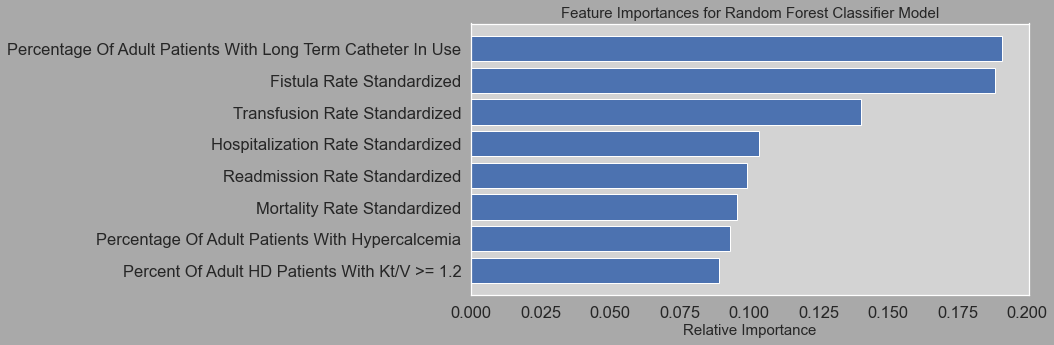

In [36]:
# Bar graph of feature importance
features = X.rename(columns={'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)': 'Percentage Of Adult Patients With Hypercalcemia'})
importances = list(rf_best.feature_importances_)
importances_sorted = np.sort(importances)
index = [0, 1, 2, 3, 4, 5, 6, 7]
importance_plot = plt.figure(figsize=(10, 5))
importance_plot = plt.barh(index, importances_sorted)
importance_plot = plt.xlabel('Relative Importance', fontsize=15)
importance_plot = plt.yticks(index, features)
importance_plot = plt.title('Feature Importances for Random Forest Classifier Model', fontsize=15)
plt.show()